In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# Loading data

In [2]:
train_data = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_data = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

# Formulating data matrices

In [3]:
X_train = train_data.loc[:, "pixel1":"pixel784"].to_numpy().reshape((train_data.shape[0], 28, 28))
y_train = train_data["label"].to_numpy().reshape(-1, 1)

X_train[:2], y_train[:5]

(array([[[107, 118, 127, ..., 170, 170, 169],
         [111, 121, 129, ..., 171, 171, 170],
         [113, 123, 131, ..., 171, 171, 171],
         ...,
         [142, 150, 159, ..., 202, 201, 200],
         [142, 151, 160, ..., 204, 203, 202],
         [142, 151, 160, ..., 204, 203, 202]],
 
        [[155, 157, 156, ..., 138,  92, 108],
         [158, 159, 159, ..., 142, 116, 143],
         [161, 161, 161, ..., 147, 125, 140],
         ...,
         [162, 159, 145, ...,  91, 101,  94],
         [153, 139, 115, ...,  97,  95, 120],
         [135, 116,  95, ..., 103, 135, 149]]]),
 array([[ 3],
        [ 6],
        [ 2],
        [ 2],
        [13]]))

In [4]:
X_test = test_data.loc[:, "pixel1":"pixel784"].to_numpy().reshape((test_data.shape[0], 28, 28))
y_test = test_data["label"].to_numpy().reshape(-1, 1)

X_test[:2], y_test[:5]

(array([[[149, 149, 150, ..., 150, 150, 149],
         [150, 150, 150, ..., 151, 150, 151],
         [150, 151, 151, ..., 151, 151, 152],
         ...,
         [ 69,  69,  77, ..., 116, 113, 118],
         [ 74,  75,  76, ..., 110, 116, 113],
         [ 75,  74,  74, ..., 112, 120, 107]],
 
        [[126, 128, 131, ..., 133, 134, 132],
         [129, 132, 134, ..., 136, 136, 134],
         [133, 135, 138, ..., 140, 139, 138],
         ...,
         [173, 174, 177, ..., 184, 182, 181],
         [172, 174, 177, ..., 184, 182, 181],
         [172, 174, 177, ..., 184, 182, 180]]]),
 array([[ 6],
        [ 5],
        [10],
        [ 0],
        [ 3]]))

# Encoding labels

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

y_train[:2], y_test[:2]

(array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]]))

# Data Generators

In [6]:
training_images = np.expand_dims(X_train, axis=3)
training_labels = y_train

testing_images = np.expand_dims(X_test, axis=3)
testing_labels = y_test


train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=10, width_shift_range=0.1,\
                                   height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,\
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow(training_images, training_labels)
test_generator = test_datagen.flow(testing_images, testing_labels)

print(training_images.shape, training_labels.shape)
print(testing_images.shape, testing_labels.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


# Model

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(24, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') >= 0.97:
            print("Accuracy >= 97, Terminating")
            self.model.stop_training = True

In [9]:
callback = myCallback()
history = model.fit_generator(train_generator, epochs=10, validation_data=test_generator, verbose=1, callbacks=[callback])

model.evaluate(testing_images/255, testing_labels, verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-05 09:25:53.901472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
858/858 [==============================] - 17s 19ms/step - loss: 2.0744 - acc: 0.3426 - val_loss: 1.0479 - val_acc: 0.6168
Epoch 2/10
858/858 [==============================] - 17s 20ms/step - loss: 0.9816 - acc: 0.6677 - val_loss: 0.5403 - val_acc: 0.8027
Epoch 3/10
858/858 [==============================] - 17s 20ms/step - loss: 0.5805 - acc: 0.7984 - val_loss: 0.3019 - val_acc: 0.8964
Epoch 4/10
858/858 [==============================] - 17s 20ms/step - loss: 0.3912 - acc: 0.8645 - val_loss: 0.2948 - val_acc: 0.8935
Epoch 5/10
858/858 [==============================] - 17s 19ms/step - loss: 0.2838 - acc: 0.9023 - val_loss: 0.1860 - val_acc: 0.9343
Epoch 6/10
858/858 [==============================] - 17s 20ms/step - loss: 0.2128 - acc: 0.9285 - val_loss: 0.1553 - val_acc: 0.9400
Epoch 7/10
858/858 [==============================] - 17s 20ms/step - loss: 0.1771 - acc: 0.9391 - val_loss: 0.0816 - val_acc: 0.9752
Epoch 8/10
858/858 [==============================] - 16s 19ms

[0.12799420952796936, 0.9595649838447571]

# Visualising plots

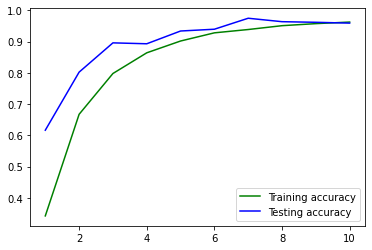

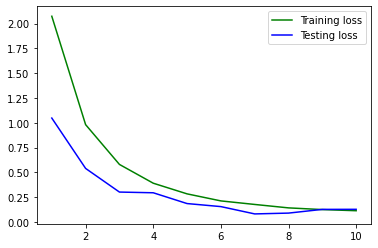

In [10]:
from matplotlib import pyplot as plt

train_acc = history.history['acc']
train_loss = history.history['loss']

test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

epoch = list(range(1, len(train_acc)+1))

plt.plot(epoch, train_acc, 'g', label='Training accuracy')
plt.plot(epoch, test_acc, 'b', label='Testing accuracy')
plt.legend()
plt.show()

plt.plot(epoch, train_loss, 'g', label='Training loss')
plt.plot(epoch, test_loss, 'b', label='Testing loss')
plt.legend()
plt.show()

In [11]:
model.save("signLanguageClassifier.h5")

In [12]:
print(model.predict(np.expand_dims(testing_images[1092], axis=0)))
print(testing_labels[1092])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
